# Creating Stratified Subsets for Training AutoML IDS Models
### Supporting: *Leveraging AutoML for Advanced Network Traffic Analysis and Intrusion Detection by Enhancing Security with a Multi-Feature IDS Dataset*

**Author:** Chibuike Abana, Doctoral Candidate, George Washington University  
**Date:** March 14, 2025  

**Purpose:**  
This script generates stratified training sets into two training subsets from the preprocessed IDS balanced training dataset. The splitting ensures representative class distribution across training subsets, which is critical for fair model training in AutoML frameworks.

**License:** MIT License  
This code is open-sourced under the MIT License. You may use, adapt, and redistribute it with proper attribution. See the `LICENSE` file for full terms.

## Loading the Dataset

In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
#  Loading the Data from s3
dataPath ='s3://final-praxis/Dataset/output-path/new-processed-data'
data = pd.read_csv(f'{dataPath}/balanced_training_nodup.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:283: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [3]:
data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,90304674,14,10,1441,1731,725,0,102.928571,191.148941,...,4197982.0,0.0,4197982,4197982,86106692.0,0.0,86106692,86106692,90304674,Benign
1,6,527689,5,4,373,172,140,0,74.600000,70.283711,...,0.0,0.0,0,0,0.0,0.0,0,0,527689,Benign
2,6,3003576,3,0,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,3003576,Benign
3,6,6442018,8,11,1148,1581,677,0,143.500000,228.129662,...,0.0,0.0,0,0,0.0,0.0,0,0,6442018,Benign
4,17,31891,1,1,35,91,35,35,35.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,Benign


In [4]:
print(f"Original data shape: {data.shape}")

Original data shape: (4421214, 80)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4421214 entries, 0 to 4421213
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min         

In [6]:
# Checking the distribution of target labels
print("Label distribution in full dataset:")
print(data['Label'].value_counts())

Label distribution in full dataset:
Benign                      1500000
DoS Hulk                    1442528
DDoS-HOIC                    865834
DDoS-LOIC-HTTP               231462
Botnet Ares                  114337
SSH-BruteForce                75358
DDoS-LOIC-UDP                 50000
DoS GoldenEye                 50000
DoS Slowloris                 49989
Web Attack - XSS              20894
Web Attack - Brute Force      20812
Name: Label, dtype: int64


## Stratifying the Dataset with by splitting the dataset into two subsets. subset 1 and subset2

In [7]:
# the split size is half
split_size = len(data) // 2  # Half of 3,236,965

In [8]:
print(split_size)

2210607


In [9]:
# subset1 and the remaining data
subset1, subset2 = train_test_split(
    data, train_size=split_size, stratify=data['Label'], random_state=42
)

In [10]:
# Previewing the new subset shape
print(f"Subset 1 shape: {subset1.shape}")


Subset 1 shape: (2210607, 80)


In [11]:
subset1.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
1752694,6,112327,5,5,291,935,291,0,58.200000,130.139156,...,0.0,0.000000,0,0,0.0,0.000000,0,0,112327,DDoS-HOIC
65391,6,2638121,10,9,1052,1525,581,0,105.200000,181.842911,...,0.0,0.000000,0,0,0.0,0.000000,0,0,2638121,Benign
1160100,6,116823375,17,26,820,21162,194,0,48.235294,74.251708,...,242641.5,63060.489853,287232,198051,58116437.5,228140.224775,58277757,57955118,116823375,Benign
3274162,6,131243,6,5,319,935,319,0,53.166667,130.231205,...,0.0,0.000000,0,0,0.0,0.000000,0,0,131243,DoS Hulk
2560433,6,5414997,5,4,20,964,20,0,4.000000,8.944272,...,0.0,0.000000,0,0,0.0,0.000000,0,0,5414997,DDoS-LOIC-HTTP


In [12]:
subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210607 entries, 1752694 to 56019
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min     

In [13]:
subset1.describe()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
count,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,...,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06
mean,6.828121e+00,1.347908e+07,1.317680e+03,9.026350e+00,4.323988e+04,5.296899e+03,3.523290e+02,3.022271e+00,7.489872e+01,1.348917e+02,...,2.345353e+01,2.623122e+05,4.311493e+04,3.141055e+05,2.338952e+05,6.249525e+06,5.259805e+05,6.739628e+06,5.826495e+06,8.879640e+07
std,2.922555e+00,3.185325e+07,1.285348e+04,1.496666e+02,4.126308e+05,2.095061e+05,9.608488e+02,1.144147e+01,2.936564e+02,3.086139e+02,...,7.313478e+00,1.237545e+06,4.550084e+05,1.497546e+06,1.150152e+06,1.832276e+07,3.796041e+06,1.920570e+07,1.806063e+07,1.153317e+09
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,4.774600e+04,5.000000e+00,5.000000e+00,2.750000e+02,9.350000e+02,2.300000e+02,0.000000e+00,5.000000e+01,8.613963e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.238900e+04
50%,6.000000e+00,1.507630e+05,5.000000e+00,5.000000e+00,3.330000e+02,9.350000e+02,3.230000e+02,0.000000e+00,6.320000e+01,1.404777e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.486050e+05
75%,6.000000e+00,2.356790e+06,6.000000e+00,5.000000e+00,4.690000e+02,9.640000e+02,3.700000e+02,0.000000e+00,7.460000e+01,1.609969e+02,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.486745e+06
max,1.700000e+01,1.200000e+08,3.096290e+05,1.202670e+05,9.908128e+06,1.560270e+08,6.424000e+04,1.350000e+03,3.135814e+04,2.531532e+04,...,4.400000e+01,1.137935e+08,7.554688e+07,1.137935e+08,1.137935e+08,1.199895e+08,7.522330e+07,1.199895e+08,1.199895e+08,4.240951e+10


In [14]:
# Checking the Label distribution
print("Training Subset 1 label distribution:")
print(subset1['Label'].value_counts())

Training Subset 1 label distribution:
Benign                      750000
DoS Hulk                    721264
DDoS-HOIC                   432917
DDoS-LOIC-HTTP              115731
Botnet Ares                  57168
SSH-BruteForce               37679
DoS GoldenEye                25000
DDoS-LOIC-UDP                25000
DoS Slowloris                24995
Web Attack - XSS             10447
Web Attack - Brute Force     10406
Name: Label, dtype: int64


In [15]:
# checking missing values
#Checking if there are any NaN or null values in the entire DataFrame
total_missing_values = subset1.isna().sum().sum()
print(f"Total number of missing (NaN or null) values in the dataset: {total_missing_values}\n")

# the count of missing values for each column
missing_values_per_column = subset1.isna().sum()

#  columns that have missing values along with their respective counts
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]

if columns_with_missing_values.empty:
    print("There are no missing (NaN or null) values in the dataset.")
else:
    print("Columns with missing (NaN or null) values and their respective counts:")
    print(columns_with_missing_values)

Total number of missing (NaN or null) values in the dataset: 0

There are no missing (NaN or null) values in the dataset.


In [16]:
# Checking for duplicate rows
duplicate_rows = subset1.duplicated().sum()
print(f"\nNumber of Duplicate Rows in subset1 Data: {duplicate_rows}")


Number of Duplicate Rows in subset1 Data: 0


In [15]:
# #  Hypothetically Removing Duplicates and Checking Distribution
# df_no_duplicates = balanced_df.drop_duplicates()
# no_dup_label_counts = df_no_duplicates['Label'].value_counts()
# no_dup_label_proportions = no_dup_label_counts / len(df_no_duplicates)

# print("\nLabel distribution after removing duplicates:")
# print(no_dup_label_counts)
# print("\nProportion of each label after removing duplicates:")
# print(no_dup_label_proportions)

/tmp/ipykernel_35196/2061916576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset1, x='Label', palette='viridis')


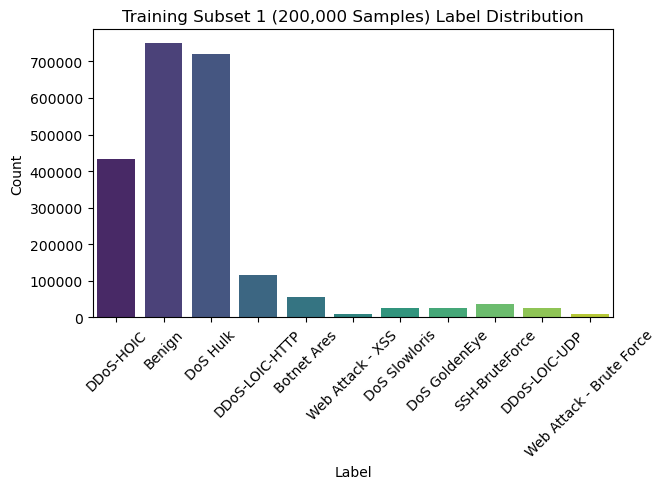

In [17]:
# Plot for Subset 1
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=subset1, x='Label', palette='viridis')
plt.title('Training Subset 1 (200,000 Samples) Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

> Ignore the label on the visual above. it is more tha *#200000* samples

In [18]:
# Previewing the new subset shape
print(f"Subset 2 shape: {subset2.shape}")

Subset 2 shape: (2210607, 80)


In [19]:
# Checking the Label distribution
print("Subset 2 label distribution:\n")
print(subset2['Label'].value_counts())

Subset 2 label distribution:

Benign                      750000
DoS Hulk                    721264
DDoS-HOIC                   432917
DDoS-LOIC-HTTP              115731
Botnet Ares                  57169
SSH-BruteForce               37679
DoS GoldenEye                25000
DDoS-LOIC-UDP                25000
DoS Slowloris                24994
Web Attack - XSS             10447
Web Attack - Brute Force     10406
Name: Label, dtype: int64


In [20]:
subset2.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
1779078,6,4838,5,5,310,935,310,0,62.00,138.636215,...,0.0,0.0,0,0,0.0,0.0,0,0,4838,DDoS-HOIC
4068717,6,117880,5,5,302,935,302,0,60.40,135.058506,...,0.0,0.0,0,0,0.0,0.0,0,0,117880,DoS Hulk
3833811,6,959813,8,5,1164,935,291,0,145.50,155.546043,...,0.0,0.0,0,0,0.0,0.0,0,0,959813,DoS Hulk
3892189,6,152344,5,5,354,935,354,0,70.80,158.313613,...,0.0,0.0,0,0,0.0,0.0,0,0,152344,DoS Hulk
594993,6,11674,4,1,77,0,46,0,19.25,23.056091,...,0.0,0.0,0,0,0.0,0.0,0,0,172114889,Benign


In [21]:
subset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210607 entries, 1779078 to 2353406
Data columns (total 80 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  int64  
 5   Total Length of Bwd Packet  int64  
 6   Fwd Packet Length Max       int64  
 7   Fwd Packet Length Min       int64  
 8   Fwd Packet Length Mean      float64
 9   Fwd Packet Length Std       float64
 10  Bwd Packet Length Max       int64  
 11  Bwd Packet Length Min       int64  
 12  Bwd Packet Length Mean      float64
 13  Bwd Packet Length Std       float64
 14  Flow Bytes/s                float64
 15  Flow Packets/s              float64
 16  Flow IAT Mean               float64
 17  Flow IAT Std                float64
 18  Flow IAT Max                int64  
 19  Flow IAT Min   

In [22]:
subset2.describe()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
count,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,...,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06,2.210607e+06
mean,6.831501e+00,1.349071e+07,1.316885e+03,9.037727e+00,4.321328e+04,5.320010e+03,3.522943e+02,3.032683e+00,7.498170e+01,1.348735e+02,...,2.344866e+01,2.629804e+05,4.278041e+04,3.145568e+05,2.347332e+05,6.261126e+06,5.241013e+05,6.750493e+06,5.839377e+06,8.894396e+07
std,2.927834e+00,3.187793e+07,1.286425e+04,1.454434e+02,4.129377e+05,2.097250e+05,9.718509e+02,1.141145e+01,2.995488e+02,3.125264e+02,...,7.319631e+00,1.260436e+06,4.341351e+05,1.507394e+06,1.177355e+06,1.836130e+07,3.793726e+06,1.924219e+07,1.810056e+07,1.147446e+09
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,4.770900e+04,5.000000e+00,5.000000e+00,2.750000e+02,9.350000e+02,2.300000e+02,0.000000e+00,5.000000e+01,8.632695e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.223500e+04
50%,6.000000e+00,1.507410e+05,5.000000e+00,5.000000e+00,3.330000e+02,9.350000e+02,3.230000e+02,0.000000e+00,6.320000e+01,1.404374e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.485590e+05
75%,6.000000e+00,2.353074e+06,6.000000e+00,5.000000e+00,4.690000e+02,9.640000e+02,3.700000e+02,0.000000e+00,7.460000e+01,1.609969e+02,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.486793e+06
max,1.700000e+01,1.200000e+08,3.052620e+05,6.886300e+04,9.768393e+06,1.005055e+08,6.496900e+04,1.460000e+03,3.130867e+04,2.541239e+04,...,4.800000e+01,1.129676e+08,7.229266e+07,1.129676e+08,1.129676e+08,1.199766e+08,7.522191e+07,1.199766e+08,1.199766e+08,4.562846e+10


In [23]:
# checking missing values
#Checking if there are any NaN or null values in the entire DataFrame
total_missing_values = subset2.isna().sum().sum()
print(f"Total number of missing (NaN or null) values in the dataset: {total_missing_values}\n")

# the count of missing values for each column
missing_values_per_column = subset2.isna().sum()

#  columns that have missing values along with their respective counts
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]

if columns_with_missing_values.empty:
    print("There are no missing (NaN or null) values in the dataset.")
else:
    print("Columns with missing (NaN or null) values and their respective counts:")
    print(columns_with_missing_values)

Total number of missing (NaN or null) values in the dataset: 0

There are no missing (NaN or null) values in the dataset.


In [24]:
# Checking for duplicate rows
duplicate_rows = subset2.duplicated().sum()
print(f"\nNumber of Duplicate Rows in subset2 Data: {duplicate_rows}")


Number of Duplicate Rows in subset2 Data: 0


In [25]:
# #  Hypothetically Removing Duplicates and Checking Distribution
# df_no_duplicates = balanced_df.drop_duplicates()
# no_dup_label_counts = df_no_duplicates['Label'].value_counts()
# no_dup_label_proportions = no_dup_label_counts / len(df_no_duplicates)

# print("\nLabel distribution after removing duplicates:")
# print(no_dup_label_counts)
# print("\nProportion of each label after removing duplicates:")
# print(no_dup_label_proportions)

/tmp/ipykernel_35196/1999529982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset2, x='Label', palette='viridis')


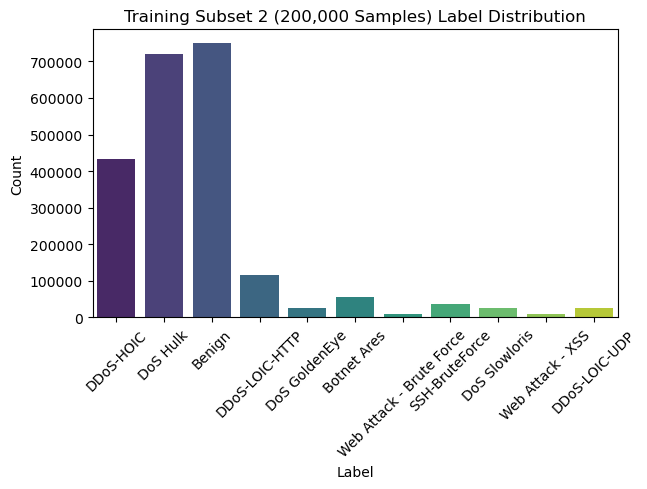

In [25]:
# Plot for Subset 2
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
sns.countplot(data=subset2, x='Label', palette='viridis')
plt.title('Training Subset 2 (200,000 Samples) Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

> Ignore the label on the visual above. it is more tha *#200000* samples

In [ ]:
# Saving the training subsets and remaining to CSV files for later use from s3
subset1.to_csv(f'{dataPath}/training_subset1.csv', index=False)
subset2.to_csv(f'{dataPath}/training_subset2.csv', index=False)